# Doctor Consultation Fee Analysis
We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the hackathon that lets you do that.

Size of training set: 5961 records

Size of test set: 1987 records

# Problem Statement
Since our target column is fees which is a continous type of a variable so we will use regression techniques to build our model.

## FEATURES

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.

## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the excel files
train_df = pd.read_excel('DCFee_Train.xlsx')
test_df = pd.read_excel('DCFee_Test.xlsx')

In [3]:
print(train_df.shape)
print(test_df.shape)

(5961, 7)
(1987, 6)


Here we see that the number of columns in the test df is 1 less than the train df as expected.

Lets visualise how the data of both test and train df looks like

In [4]:
train_df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [5]:
test_df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

As expected all the coloumns are of the same data type in both the df and test df does not contain the fee column which is our target variable.

In [6]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [7]:
test_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


Miscellaneous_Info can be dropped as it is an accumulation of place and rating features

Need to remove years experience string from Experience column.

In [8]:
train_column = train_df.columns

In [9]:
for col in train_column:
    print(f"The value counts of the column {col} is \n {train_df[col].value_counts()}")
    print("*"*100)

The value counts of the column Qualification is 
 BDS                                                                                                                    488
BHMS                                                                                                                   477
BAMS                                                                                                                   471
MBBS                                                                                                                   334
MBBS, MS - ENT                                                                                                         220
                                                                                                                      ... 
MD - Homeopathy, BHMS, PGDPC (Post Graduation Diploma In Psychological Counselling)                                      1
MBBS, Diploma in Hospital Administration                                                 

Lets check the null values

In [10]:
train_df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [11]:
test_df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [12]:
# I am going to drop null values of place feature. After observing excel file observed that, all fees are equivalent to 1. 
#  Only one MBBS is there and qualification is also not correct.
train_df['Place']=train_df['Place'].dropna(axis=0)
test_df['Place']=test_df['Place'].dropna(axis=0)

In [13]:
test_df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [14]:
train_df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [15]:
# Function for Extracting the city from the place column
def fnGetCityName(address):
    if ',' in address:
        lIndex=address.index(',')
        return(address[lIndex+2:])
    else:
        return(address)

In [16]:
# Function for ectracting the qualification
def fnGetQualification(Qual):
    if '-' in Qual:
        lIndex=Qual.index('-')
        return(Qual[:lIndex-1])
    else:
        return(Qual)

In [17]:
lIndex=train_df['Qualification'][0].index('-')
print(train_df['Qualification'][0][:lIndex-1])

BHMS, MD


In [18]:
# Replacing string values for Train data set
train_df['Experience']=train_df['Experience'].str.replace(" years experience","",case = False)
train_df['Rating']=train_df['Rating'].str.replace("%","",case = False)
# Since, I was getting an error stating that float object has no index function. So, converted the datatype first.
train_df['Place']=pd.DataFrame(map(str,train_df['Place']))
train_df['Place']=pd.DataFrame(map(fnGetCityName,train_df['Place']))
# I am storing only degress not specialization as that will be present in Profile feature
train_df['Qualification']=pd.DataFrame(map(str,train_df['Qualification']))
train_df['Qualification']=pd.DataFrame(map(fnGetQualification,train_df['Qualification']))

In [19]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD",24,100,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD",12,98,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS",9,NaN,Bangalore,ENT Specialist,NaN,300
3,BSc,12,NaN,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [20]:
train_df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [21]:
# Converting Rating and Experience feature to numeric
train_df['Rating']=pd.to_numeric(train_df['Rating'])
train_df['Experience']=pd.to_numeric(train_df['Experience'])

In [22]:
# Removing Miscellaneous info, as information is present under different features.
train_df.drop('Miscellaneous_Info',axis=1,inplace=True)

In [23]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD",24,100.0,Ernakulam,Homeopath,100
1,"BAMS, MD",12,98.0,Bangalore,Ayurveda,350
2,"MBBS, MS",9,NaN,Bangalore,ENT Specialist,300
3,BSc,12,NaN,Bangalore,Ayurveda,250
4,BAMS,20,100.0,Chennai,Ayurveda,250


In [24]:
train_df.describe()

,Experience,Rating,Fees
count,5961.000000,2659.000000,5961.000000
mean,17.303976,94.643475,307.944640
std,11.142798,7.852813,190.920373
min,0.000000,7.000000,5.000000
25%,9.000000,93.000000,150.000000
50%,14.000000,97.000000,300.000000
75%,23.000000,100.000000,500.000000
max,66.000000,100.000000,950.000000


In [25]:
train_df.isnull().sum()

Qualification       0
Experience          0
Rating           3302
Place               0
Profile             0
Fees                0
dtype: int64

In [26]:
# Imputing null values for rating feature. Since it's an float feature, we will replace by mean or median.
print(train_df['Rating'].mean())
print(train_df['Rating'].median())
# I will replace null values by median
train_df['Rating'].fillna(train_df['Rating'].median(),inplace=True)

94.64347499059797
97.0


In [27]:
print(len(list(train_df['Qualification'].value_counts())))
# 621 distinct Qualifications are available
print(len(list(train_df['Place'].value_counts())))
# 10 differnt cities data is given to us.
print(len(list(train_df['Profile'].value_counts())))

621
11
6


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

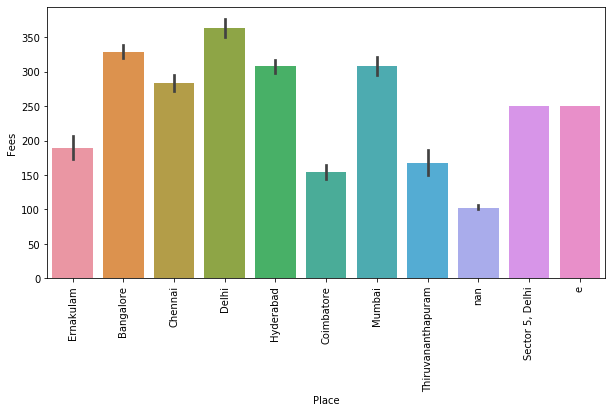

In [28]:
# Barplots
plt.figure(figsize=(10,5))
sns.barplot(x='Place',y='Fees',data=train_df)
plt.xticks(rotation=90)

As expected higher fees is charged in cities like Chennai, Mumbai, Hyderabad, Delhi and Bangalore

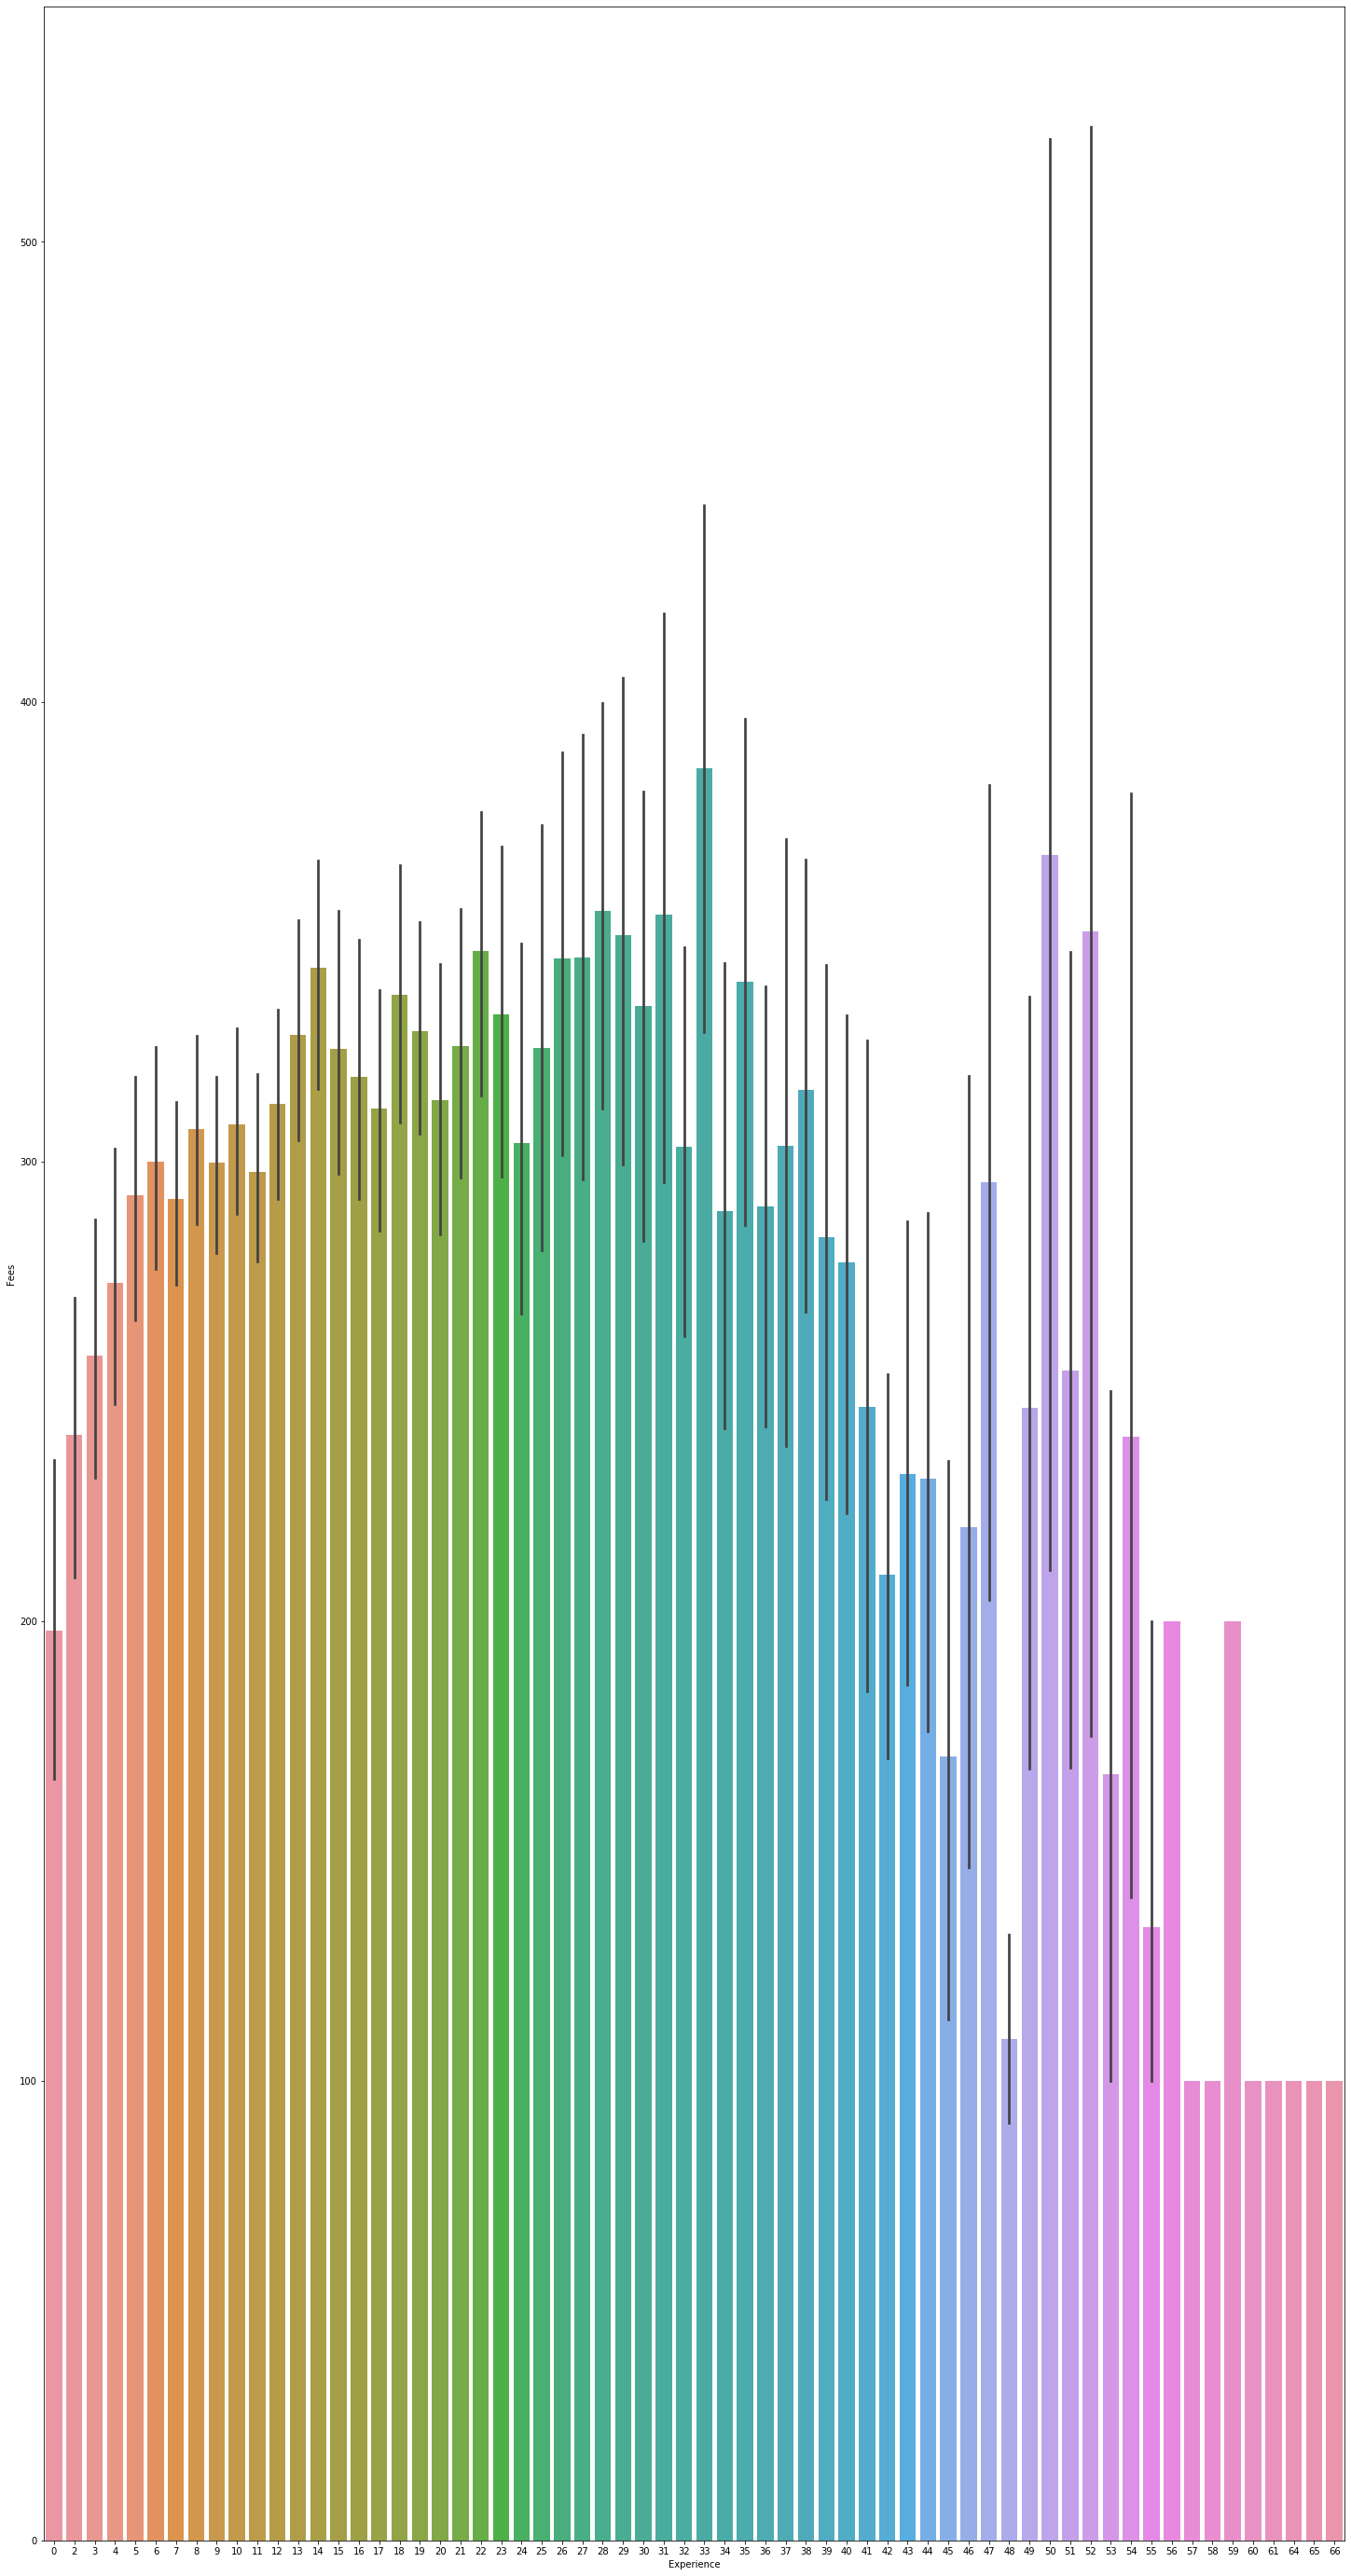

In [29]:
plt.figure(figsize=(25,50))
sns.barplot(x='Experience',y='Fees',data=train_df)

Doctors with 5 to 30 years of experience are charging higher fees.

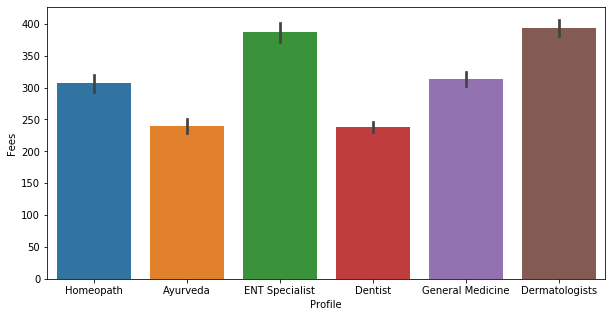

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x='Profile',y='Fees',data=train_df)

ENT specialists and Dermatologists are charging higher fees.

# Bivariate Analysis

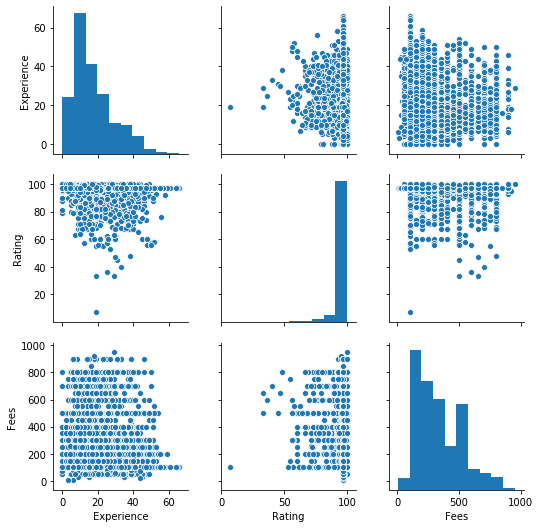

In [31]:
# Bivariate Analysis
# Plotting pairplot
sns.pairplot(data=train_df)

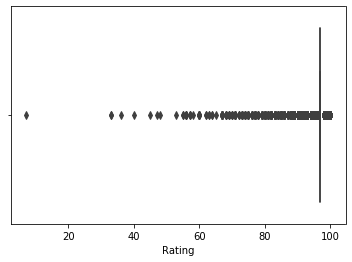

In [32]:
# Outlier analysis
sns.boxplot(train_df['Rating'])

Rating is a vague feature basically, different people rate differently, also if we remove the outliers then we might loose a large amount of data

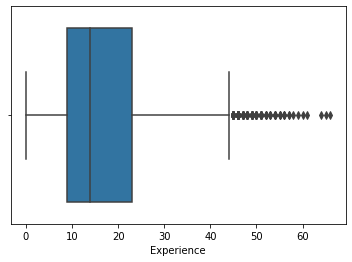

In [33]:
sns.boxplot(train_df['Experience'])

Experience also is a good feature and there is no vague data which I see as an outlier. A doctor can have experience ranging from 0-65

(3.0, 0.0)

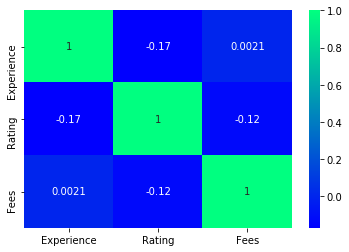

In [34]:
# Correlation Matrix
corr_mat=train_df.corr()
ax = sns.heatmap(corr_mat,annot=True,cmap='winter')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Our target variable does not have a very good correlation with other features so we will not remove any of the feature, as all seems important feature

# Model Selection

In [35]:
Y=train_df['Fees']
X=train_df.drop('Fees',axis=1)

In [36]:
print(X.shape)
print(Y.shape)

(5961, 5)
(5961,)


In [37]:
# Normalization
colList=['Rating','Experience']
for col in colList:
    X[col]=(X[col]-min(X[col]))/(max(X[col])-min(X[col]))

In [38]:
from sklearn.preprocessing import OrdinalEncoder
# Encoding
X = OrdinalEncoder().fit_transform(X)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [40]:
# Calculating root mean squared log error.
def rmlse(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

In [41]:
max_r2Score=0
active_r2s=0
iBest_rs=0
lm=LinearRegression()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs, test_size=0.2)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    active_r2s=rmlse(pred,y_test)
    if active_r2s>max_r2Score:
        max_r2Score=active_r2s
        iBest_rs=iActive_rs
print(f"Best rmlse Score is {max_r2Score} for random state {iBest_rs}.")

Best rmlse Score is 0.7801569365041532 for random state 90.


In [42]:
max_r2Score=0
active_r2s=0
iBest_rs=0
lm=DecisionTreeRegressor()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    active_r2s=rmlse(pred,y_test)
    if active_r2s>max_r2Score:
        max_r2Score=active_r2s
        iBest_rs=iActive_rs
print(f"Best rmlse Score is {max_r2Score} for random state {iBest_rs}.")

Best rmlse Score is 0.6873000303697432 for random state 74.


In [43]:
max_r2Score=0
active_r2s=0
iBest_rs=0
lm=SVR(gamma='scale')
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    active_r2s=rmlse(pred,y_test)
    if active_r2s>max_r2Score:
        max_r2Score=active_r2s
        iBest_rs=iActive_rs
print(f"Best rmlse Score is {max_r2Score} for random state {iBest_rs}.")

Best rmlse Score is 0.7946687438126692 for random state 42.


In [44]:
max_r2Score=0
active_r2s=0
iBest_rs=0
lm=AdaBoostRegressor()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    active_r2s=rmlse(pred,y_test)
    if active_r2s>max_r2Score:
        max_r2Score=active_r2s
        iBest_rs=iActive_rs

print("Best rmlse Score is {} for random state {}.".format(max_r2Score,iBest_rs))

Best rmlse Score is 0.7735062014469717 for random state 42.


In [45]:
max_r2Score=0
active_r2s=0
iBest_rs=0
lm=GradientBoostingRegressor()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    active_r2s=rmlse(pred,y_test)
    if active_r2s>max_r2Score:
        max_r2Score=active_r2s
        iBest_rs=iActive_rs

print("Best rmlse Score is {} for random state {}.".format(max_r2Score,iBest_rs))

Best rmlse Score is 0.8121907080576838 for random state 90.


Gradient Boosting Regressor gives us the maximum r2 score at random state 90 so we will finalise our model using this algorithm

In [46]:
# Gradient Boosting Classifier is giving best result. Let's deploy it after checking it's cross val score.
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['friedman_mse', 'mse', 'mae'],'n_estimators':[100,200,300]}
gbr=GradientBoostingRegressor()
gsgb=GridSearchCV(gbr,parameters)
gsgb.fit(X,Y)
print(gsgb.best_params_)

{'criterion': 'friedman_mse', 'n_estimators': 100}


In [47]:
from sklearn.model_selection import cross_val_score
# Gradient Boost Algorithm is giving us the best result with 99% accuracy, let's use corss validation and later prepare our final model.
cross_val_score(GradientBoostingRegressor(),X,Y,cv=5,scoring="r2").mean()

0.19446400882017703

It's a low score, model is not suffering from over or under fitting.

In [48]:
# Max random state is coming around 90 and best model came out to be Gradient Boosting. We will create final model around that.
gbm=GradientBoostingRegressor(criterion='mse',n_estimators=100)
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=90,test_size=0.2)
gbm.fit(x_train,y_train)
pred=gbm.predict(x_test)

In [49]:
# Checking error and accuracy
print("r2_score is ",rmlse(pred,y_test))

r2_score is  0.8121123073783514


In [50]:
# Saving the model using joblib
import joblib
# Saving model as pickle in a file
joblib.dump(gbm,'GradBoost_Doctor.pkl')

['GradBoost_Doctor.pkl']